**Bab 1 - Pengenalan Machine Learning dengan Data Upah Pekerja Indonesia**

_Analisis hubungan antara tahun dan rata-rata upah pekerja per jam di Indonesia_

# Persiapan

Beberapa pustaka dasar yang digunakan antara lain *numpy* untuk operasi numerik, *os* untuk pengelolaan sistem file, dan *matplotlib.pyplot* untuk visualisasi data. Selain itu, dilakukan pula pengaturan parameter default pada plot, seperti ukuran label sumbu, agar grafik yang dihasilkan terlihat lebih rapi. Untuk memastikan hasil yang konsisten setiap kali kode dijalankan, ditetapkan pula *seed* pada random number generator dengan `rnd.seed(42)`. Terakhir, didefinisikan fungsi *helper* bernama `save_fig()` yang berfungsi mempermudah proses penyimpanan grafik yang telah dibuat.

In [1]:
# Untuk mendukung Python 2 dan Python 3
from __future__ import division, print_function, unicode_literals

# Import modul umum
import numpy as np
import numpy.random as rnd
import os

# Untuk membuat output notebook stabil di setiap run
rnd.seed(42)

# Untuk membuat plot yang bagus
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokasi menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "upah_analysis"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Memuat dan Menyiapkan Data Upah Pekerja

Membaca dataset upah, membersihkannya, serta memastikan format datanya siap dianalisis. Proses dimulai dengan memuat data—biasanya dari file berformat .csv—menggunakan pandas, meskipun impor pandas tidak terlihat dalam cuplikan kode namun merupakan langkah standar. Setelah data dimuat, dilakukan pemilihan fitur penting, yaitu kolom Tahun sebagai fitur (
𝑋
X) dan Rata-Rata Upah per Jam sebagai target (
𝑦
y). Selanjutnya, data fitur (Tahun) di-reshape menjadi format dua dimensi menggunakan .reshape(-1, 1) agar kompatibel dengan kebutuhan model Machine Learning.

In [2]:
import pandas as pd

# Memuat data upah format wide
upah_wide = pd.read_csv("upah.csv")
print("Data format wide:")
print(upah_wide.head())

Data format wide:
         provinsi  upah.2015  upah.2016  upah.2017  upah.2018  upah.2019  \
0            ACEH      11226      13627      14809      13814      15065   
1  SUMATERA UTARA      10618      11646      13396      13257      14061   
2  SUMATERA BARAT      11241      13206      14378      14431      15210   
3            RIAU      13303      15506      15182      15613      16270   
4           JAMBI      12954      13169      14326      14007      14304   

   upah.2020  upah.2021  upah.2022  
0      18099      17037      16772  
1      15949      15486      15131  
2      17571      16630      15887  
3      18411      19144      18626  
4      15840      16043      16042  


In [3]:
# Memuat data upah format long (sudah dalam bentuk tidy)
upah_df = pd.read_csv("upah.df.csv")
print("Data format long:")
upah_df.head(10)

Data format long:


,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
5,ACEH,2020,18099
6,ACEH,2021,17037
7,ACEH,2022,16772
8,SUMATERA UTARA,2015,10618
9,SUMATERA UTARA,2016,11646


In [4]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
upah_df.describe()


Statistik Deskriptif:


,tahun,upah
count,280.00000,280.000000
mean,2018.50000,16621.010714
std,2.29539,4371.803056
min,2015.00000,8525.000000
25%,2016.75000,13468.750000
50%,2018.50000,15845.000000
75%,2020.25000,18634.750000
max,2022.00000,32685.000000


# Eksplorasi Data Upah Nasional

Memperoleh pemahaman awal mengenai tren upah secara keseluruhan. Langkah pertama dilakukan dengan menghitung serta menampilkan statistik deskriptif—seperti rata-rata, median, nilai minimum, dan maksimum—dari kolom upah untuk memberikan gambaran umum kondisi data. Setelah itu, dibuat visualisasi berupa scatter plot atau line plot yang menunjukkan hubungan antara Tahun dan Rata-Rata Upah Nasional, sehingga tren kenaikan atau penurunan upah dari tahun ke tahun dapat terlihat dengan lebih jelas secara visual.

In [5]:
# Filter data Indonesia (rata-rata nasional)
indonesia_data = upah_df[upah_df['provinsi'] == 'INDONESIA'].copy()
indonesia_data

,provinsi,tahun,upah
272,INDONESIA,2015,11434
273,INDONESIA,2016,14068
274,INDONESIA,2017,14731
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089
279,INDONESIA,2022,17542


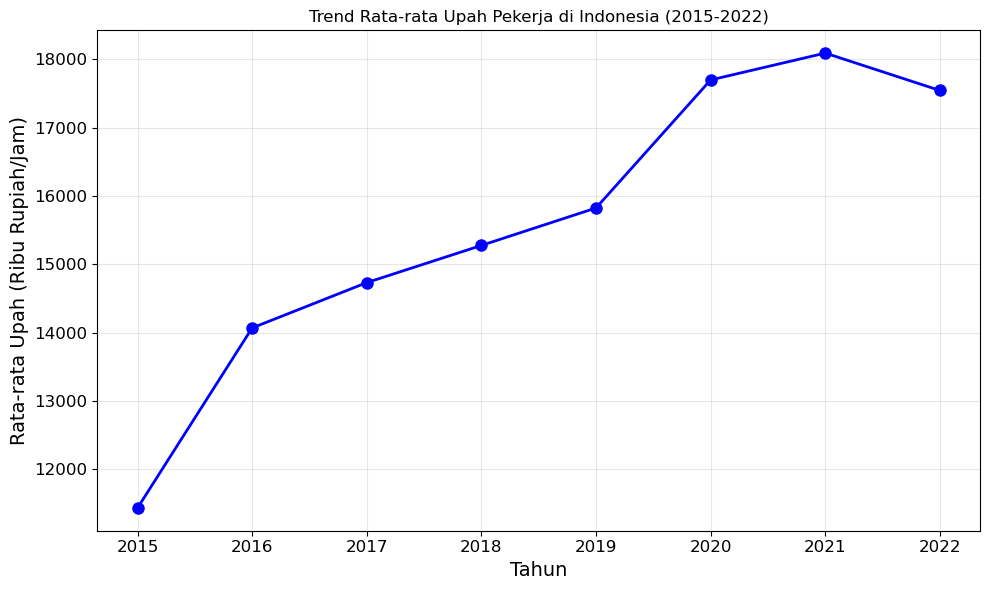

In [6]:
# Visualisasi trend upah nasional
plt.figure(figsize=(10, 6))
plt.plot(indonesia_data['tahun'], indonesia_data['upah'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Upah (Ribu Rupiah/Jam)')
plt.title('Trend Rata-rata Upah Pekerja di Indonesia (2015-2022)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Machine Learning: Prediksi Upah Berdasarkan Tahun

Melatih model Machine Learning sederhana yang dapat memprediksi upah berdasarkan tahun. Proses dimulai dengan membagi dataset menjadi data pelatihan (training) dan data pengujian (testing). Data pelatihan digunakan untuk mengajarkan model pola hubungan antara tahun dan upah, sementara data pengujian berfungsi untuk mengevaluasi seberapa baik model mampu memprediksi nilai upah pada data yang belum pernah dilihat sebelumnya. Dengan pemisahan ini, kinerja model dapat dinilai secara lebih objektif.

In [7]:
# Menyiapkan data untuk training
# Menggunakan semua provinsi kecuali Indonesia (agregat nasional)
training_data = upah_df[upah_df['provinsi'] != 'INDONESIA'].copy()

# Membuat sample data untuk visualisasi (beberapa provinsi)
sample_provinces = ['JAWA BARAT', 'JAWA TIMUR', 'JAWA TENGAH', 'BANTEN', 'DKI JAKARTA']
sample_data = upah_df[upah_df['provinsi'].isin(sample_provinces)].copy()

print(f"Jumlah data training: {len(training_data)}")
print(f"Jumlah data sample: {len(sample_data)}")

Jumlah data training: 272
Jumlah data sample: 40


Menyimpan gambar upah_scatter_sample


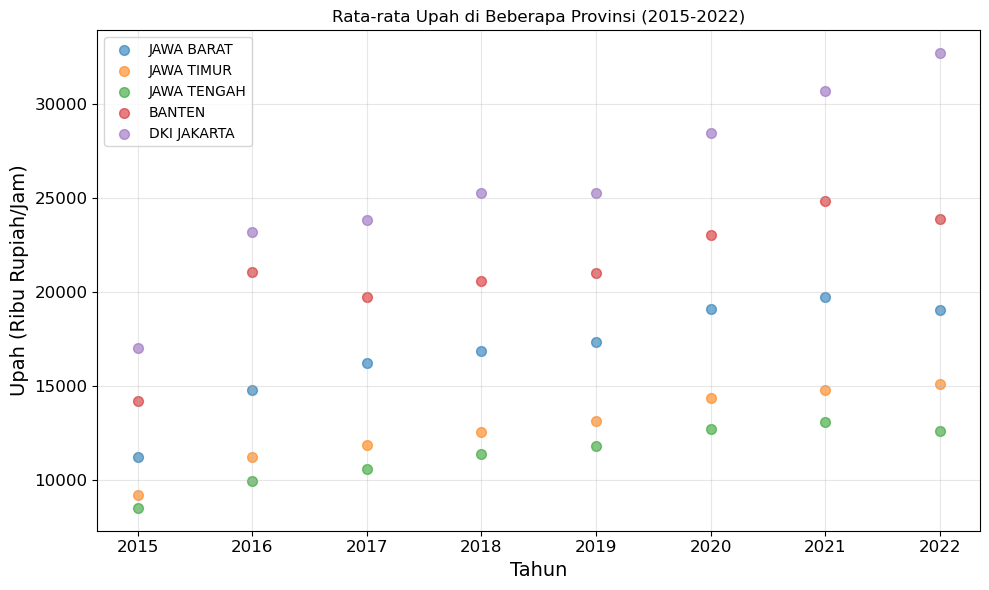

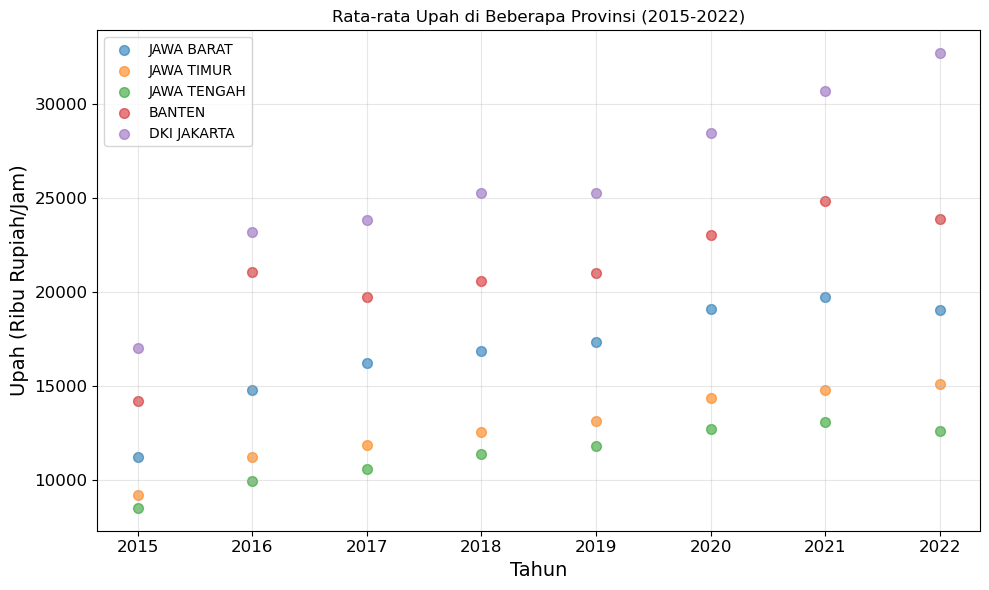

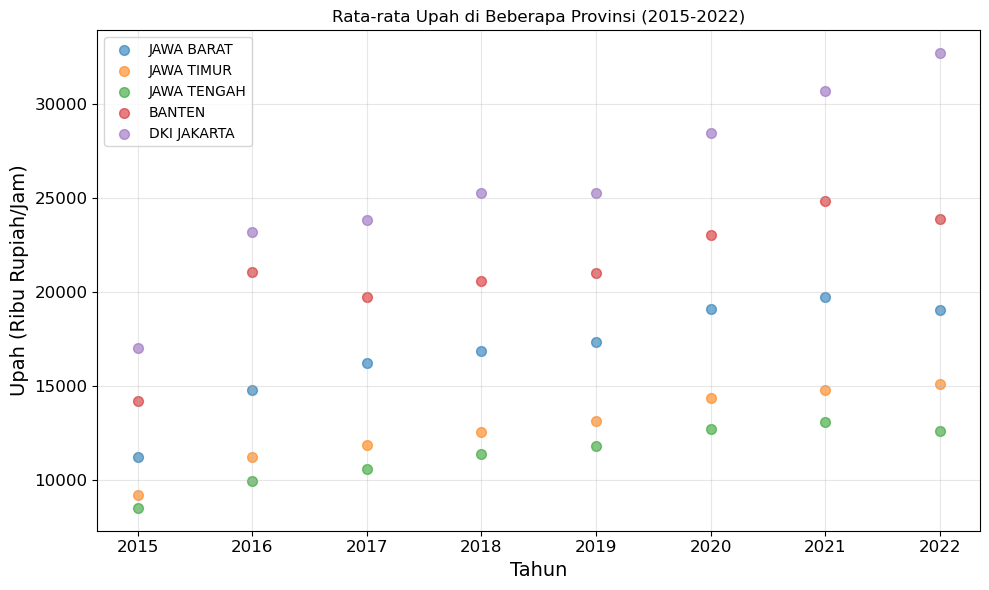

In [11]:
# Scatter plot sample data
plt.figure(figsize=(10, 6))
for prov in sample_provinces:
    prov_data = sample_data[sample_data['provinsi'] == prov]
    plt.scatter(prov_data['tahun'], prov_data['upah'], label=prov, alpha=0.6, s=50)

plt.xlabel('Tahun')
plt.ylabel('Upah (Ribu Rupiah/Jam)')
plt.title('Rata-rata Upah di Beberapa Provinsi (2015-2022)')
plt.legend()
plt.grid(True, alpha=0.3)
save_fig('upah_scatter_sample')
plt.show()

# Model Regresi Linear

Melatih dan melakukan prediksi menggunakan model regresi linier sederhana, dengan asumsi bahwa terdapat hubungan linier antara tahun dan upah. Proses dimulai dengan menginisialisasi model menggunakan kelas LinearRegression dari sklearn.linear_model. Selanjutnya, model dilatih dengan memanggil model.fit(X_train, y_train) agar dapat menemukan nilai slope (𝑚) dan intercept (c) terbaik sesuai persamaan 𝑦 = 𝑚𝑥 + 𝑐. Setelah proses pelatihan selesai, model yang telah terbentuk digunakan untuk memprediksi nilai upah pada data pengujian, sehingga dapat dievaluasi kemampuan model dalam menggeneralisasi data baru.

In [12]:
from sklearn import linear_model

# Menyiapkan data X (tahun) dan y (upah)
X_train = np.c_[training_data['tahun']]
y_train = np.c_[training_data['upah']]

# Membuat dan melatih model
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Mendapatkan parameter model
theta0 = lin_reg_model.intercept_[0]
theta1 = lin_reg_model.coef_[0][0]

print(f"Parameter Model:")
print(f"θ₀ (intercept) = {theta0:.2f}")
print(f"θ₁ (slope) = {theta1:.2f}")
print(f"\nPersamaan: Upah = {theta0:.2f} + {theta1:.2f} × Tahun")

Parameter Model:
θ₀ (intercept) = -1624624.29
θ₁ (slope) = 813.12

Persamaan: Upah = -1624624.29 + 813.12 × Tahun


Menyimpan gambar upah_linear_regression


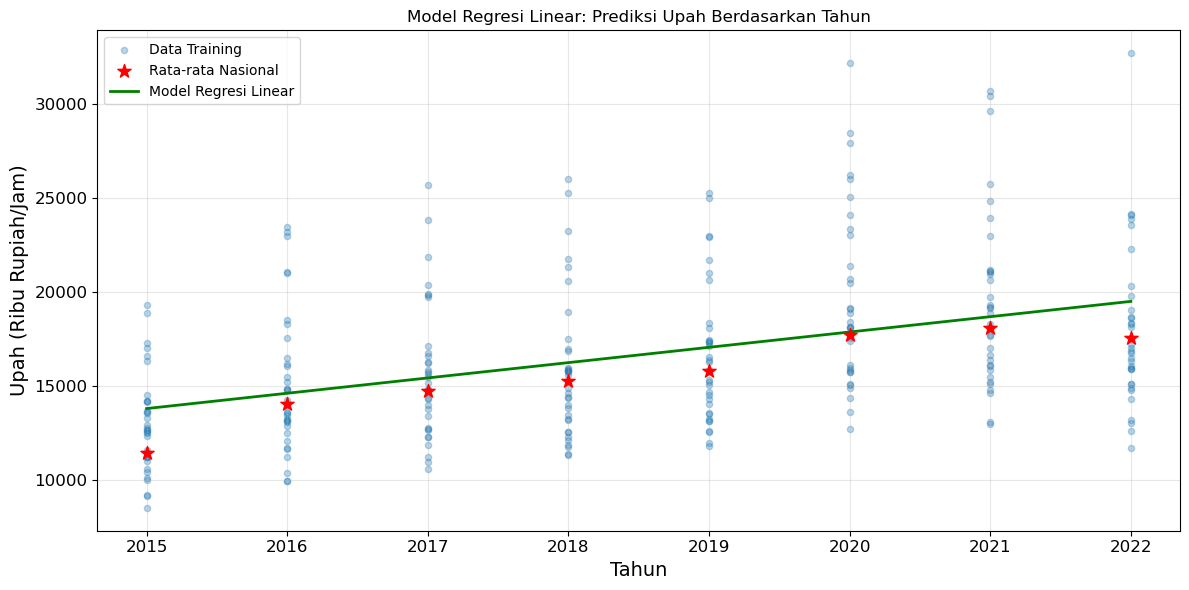

In [13]:
# Visualisasi model dengan data training
plt.figure(figsize=(12, 6))
plt.scatter(training_data['tahun'], training_data['upah'], alpha=0.3, s=20, label='Data Training')
plt.scatter(indonesia_data['tahun'], indonesia_data['upah'], color='red', s=100, 
            marker='*', label='Rata-rata Nasional', zorder=5)

# Plot garis regresi
X_range = np.linspace(2015, 2022, 100)
y_pred = theta0 + theta1 * X_range
plt.plot(X_range, y_pred, 'g-', linewidth=2, label='Model Regresi Linear')

plt.xlabel('Tahun')
plt.ylabel('Upah (Ribu Rupiah/Jam)')
plt.title('Model Regresi Linear: Prediksi Upah Berdasarkan Tahun')
plt.legend()
plt.grid(True, alpha=0.3)
save_fig('upah_linear_regression')
plt.show()

# Prediksi untuk Tahun Baru

Menggunakan model yang telah dilatih guna memproyeksikan rata-rata upah pada tahun-tahun mendatang. Langkah pertama dilakukan dengan menyiapkan data input baru, seperti tahun 2023, 2024, dan seterusnya. Setelah data siap, proyeksi dilakukan dengan menerapkan fungsi model.predict() pada tahun-tahun tersebut untuk mendapatkan estimasi upah di masa depan. Hasil prediksi kemudian divisualisasikan dengan menambahkan titik-titik proyeksi ke dalam plot data historis, sehingga tren upah ke depan dapat terlihat secara lebih jelas.

In [14]:
# Prediksi untuk tahun 2023 dan 2024
tahun_prediksi = [[2023], [2024], [2025]]
prediksi_upah = lin_reg_model.predict(tahun_prediksi)

print("Prediksi Rata-rata Upah:")
for i, tahun in enumerate(tahun_prediksi):
    print(f"Tahun {tahun[0]}: Rp {prediksi_upah[i][0]:.2f} ribu/jam")

Prediksi Rata-rata Upah:
Tahun 2023: Rp 20310.59 ribu/jam
Tahun 2024: Rp 21123.70 ribu/jam
Tahun 2025: Rp 21936.82 ribu/jam


Menyimpan gambar upah_prediction


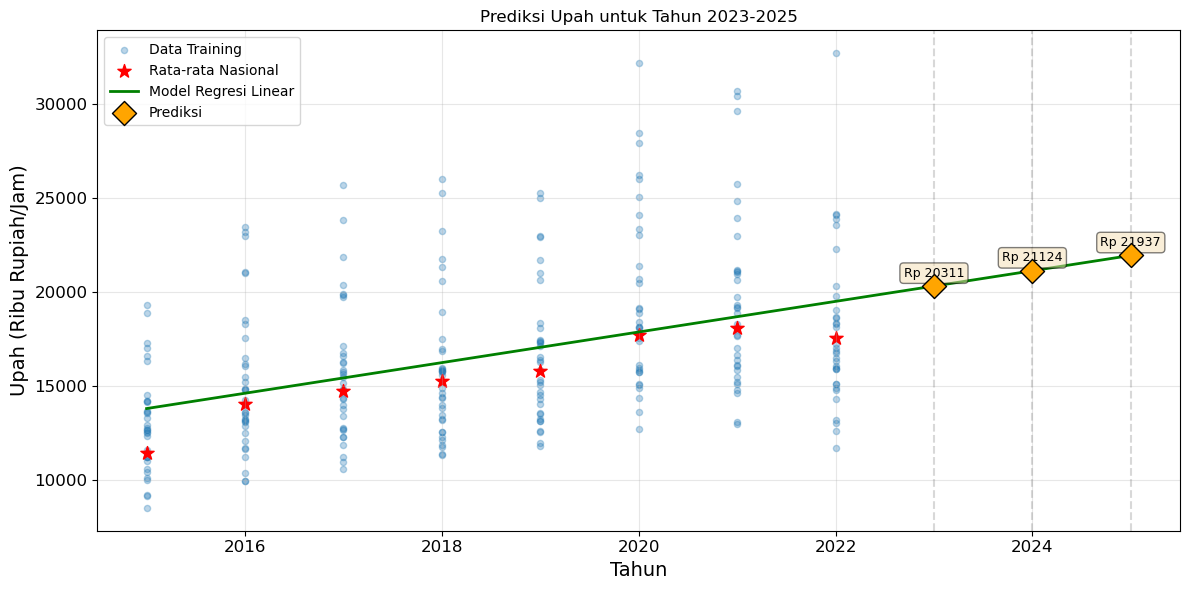

In [15]:
# Visualisasi prediksi
plt.figure(figsize=(12, 6))
plt.scatter(training_data['tahun'], training_data['upah'], alpha=0.3, s=20, label='Data Training')
plt.scatter(indonesia_data['tahun'], indonesia_data['upah'], color='red', s=100, 
            marker='*', label='Rata-rata Nasional')

# Plot garis regresi dengan prediksi
X_extended = np.linspace(2015, 2025, 100)
y_extended = theta0 + theta1 * X_extended
plt.plot(X_extended, y_extended, 'g-', linewidth=2, label='Model Regresi Linear')

# Plot prediksi
plt.scatter([2023, 2024, 2025], prediksi_upah, color='orange', s=150, 
            marker='D', label='Prediksi', zorder=5, edgecolors='black')

# Tambahkan garis vertikal untuk tahun prediksi
for i, tahun in enumerate([2023, 2024, 2025]):
    plt.axvline(x=tahun, color='gray', linestyle='--', alpha=0.3)
    plt.text(tahun, prediksi_upah[i][0] + 500, f'Rp {prediksi_upah[i][0]:.0f}', 
             ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.xlabel('Tahun')
plt.ylabel('Upah (Ribu Rupiah/Jam)')
plt.title('Prediksi Upah untuk Tahun 2023-2025')
plt.legend()
plt.grid(True, alpha=0.3)
save_fig('upah_prediction')
plt.show()

# Evaluasi Model

Menilai seberapa baik kinerja Model Regresi Linear dalam memprediksi upah. Evaluasi dilakukan menggunakan metrik R² (R-squared) dengan menghitung nilai model.score(X_test, y_test). Nilai R² menggambarkan proporsi variasi pada variabel dependen (upah) yang dapat dijelaskan oleh variabel independen (tahun). Semakin mendekati angka 1.0, semakin baik kecocokan model terhadap data, yang berarti model mampu menjelaskan pola hubungan antara tahun dan upah dengan sangat baik.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Prediksi pada data training
y_train_pred = lin_reg_model.predict(X_train)

# Hitung metrik evaluasi
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print("Metrik Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"\nInterpretasi: Model menjelaskan {r2*100:.2f}% variasi dalam data upah")

Metrik Evaluasi Model:
Mean Squared Error (MSE): 15972212.69
Root Mean Squared Error (RMSE): 3996.53
Mean Absolute Error (MAE): 3054.17
R² Score: 0.1785

Interpretasi: Model menjelaskan 17.85% variasi dalam data upah


# Analisis Per Provinsi

Mengidentifikasi serta memvisualisasikan perbedaan upah antar wilayah di Indonesia. Proses dimulai dengan mengelompokkan data berdasarkan Provinsi dan menghitung rata-rata upah untuk setiap provinsi pada tahun-tahun tertentu. Setelah pengelompokan selesai, dibuat visualisasi—misalnya berupa bar chart—yang menampilkan rata-rata upah per provinsi. Grafik ini menyoroti adanya kesenjangan upah antar wilayah, sekaligus memperlihatkan variasi regional yang cukup signifikan, yang menjadi salah satu temuan utama dalam analisis.

In [17]:
# Provinsi dengan upah tertinggi dan terendah di 2022
data_2022 = upah_df[upah_df['tahun'] == 2022].copy()
data_2022 = data_2022[data_2022['provinsi'] != 'INDONESIA']  # Exclude Indonesia

tertinggi = data_2022.nlargest(5, 'upah')
terendah = data_2022.nsmallest(5, 'upah')

print("\n5 Provinsi dengan Upah Tertinggi (2022):")
print(tertinggi[['provinsi', 'upah']].to_string(index=False))

print("\n5 Provinsi dengan Upah Terendah (2022):")
print(terendah[['provinsi', 'upah']].to_string(index=False))


5 Provinsi dengan Upah Tertinggi (2022):
   provinsi  upah
DKI JAKARTA 32685
PAPUA BARAT 24128
      PAPUA 24097
     BANTEN 23880
  KEP. RIAU 23528

5 Provinsi dengan Upah Terendah (2022):
           provinsi  upah
NUSA TENGGARA BARAT 11734
        JAWA TENGAH 12604
NUSA TENGGARA TIMUR 13012
            LAMPUNG 13218
          GORONTALO 14289


Menyimpan gambar upah_comparison_provinces


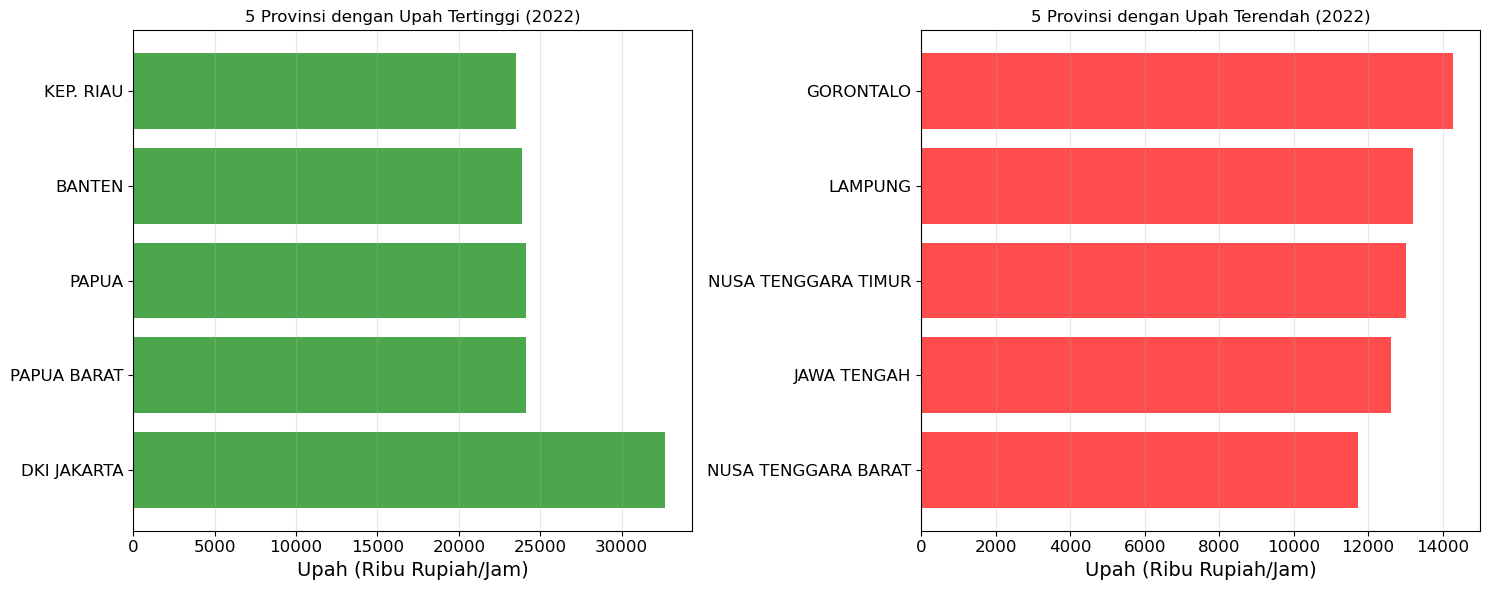

In [18]:
# Visualisasi perbandingan provinsi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Provinsi tertinggi
ax1.barh(tertinggi['provinsi'], tertinggi['upah'], color='green', alpha=0.7)
ax1.set_xlabel('Upah (Ribu Rupiah/Jam)')
ax1.set_title('5 Provinsi dengan Upah Tertinggi (2022)')
ax1.grid(True, alpha=0.3, axis='x')

# Provinsi terendah
ax2.barh(terendah['provinsi'], terendah['upah'], color='red', alpha=0.7)
ax2.set_xlabel('Upah (Ribu Rupiah/Jam)')
ax2.set_title('5 Provinsi dengan Upah Terendah (2022)')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
save_fig('upah_comparison_provinces')
plt.show()

# Model K-Nearest Neighbors (KNN)

Mencoba model Machine Learning non-linier lain, yaitu K-Nearest Neighbors (KNN), sebagai pembanding terhadap regresi linear. Proses dimulai dengan menginisialisasi model menggunakan kelas KNeighborsRegressor dari sklearn.neighbors. Selanjutnya, model dilatih dan digunakan untuk memprediksi upah pada data pengujian dengan prosedur yang serupa dengan regresi linear. Setelah itu, dilakukan evaluasi menggunakan nilai R² score untuk menilai kinerja model. Perbandingan nilai R² antara Regresi Linear dan KNN kemudian digunakan untuk menentukan model mana yang paling sesuai dengan karakteristik data upah tersebut.

In [19]:
from sklearn import neighbors

# Membuat dan melatih model KNN
knn_model = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi dengan KNN
prediksi_knn = knn_model.predict(tahun_prediksi)

print("Prediksi Upah dengan KNN (n_neighbors=5):")
for i, tahun in enumerate(tahun_prediksi):
    print(f"Tahun {tahun[0]}: Rp {prediksi_knn[i][0]:.2f} ribu/jam")

Prediksi Upah dengan KNN (n_neighbors=5):
Tahun 2023: Rp 16491.60 ribu/jam
Tahun 2024: Rp 16491.60 ribu/jam
Tahun 2025: Rp 16491.60 ribu/jam


Menyimpan gambar upah_model_comparison


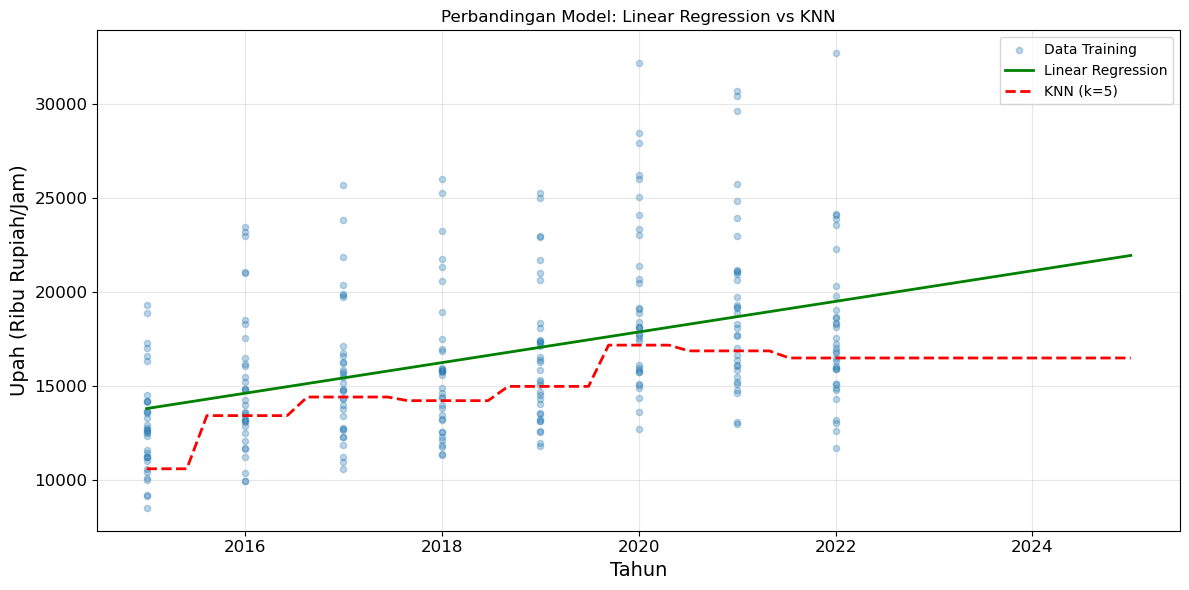

In [20]:
# Perbandingan Linear Regression vs KNN
plt.figure(figsize=(12, 6))
plt.scatter(training_data['tahun'], training_data['upah'], alpha=0.3, s=20, label='Data Training')

# Linear Regression
X_range = np.linspace(2015, 2025, 100)
y_lr = theta0 + theta1 * X_range
plt.plot(X_range, y_lr, 'g-', linewidth=2, label='Linear Regression')

# KNN predictions
X_range_knn = np.linspace(2015, 2025, 50).reshape(-1, 1)
y_knn = knn_model.predict(X_range_knn)
plt.plot(X_range_knn, y_knn, 'r--', linewidth=2, label='KNN (k=5)')

plt.xlabel('Tahun')
plt.ylabel('Upah (Ribu Rupiah/Jam)')
plt.title('Perbandingan Model: Linear Regression vs KNN')
plt.legend()
plt.grid(True, alpha=0.3)
save_fig('upah_model_comparison')
plt.show()

# Trend Pertumbuhan Upah

Menganalisis tingkat perubahan upah dari tahun ke tahun. Analisis dilakukan dengan menghitung **Year-over-Year (YoY) Growth**. Perhitungan ini membantu mengukur seberapa cepat upah mengalami kenaikan setiap tahunnya. Setelah nilai YoY diperoleh, dibuat sebuah plot yang menampilkan **Tingkat Pertumbuhan Upah Tahunan**, sehingga pola pertumbuhan, volatilitas, serta potensi anomali dalam kenaikan upah dapat terlihat dengan jelas secara visual.


Pertumbuhan Upah Nasional (Year-over-Year):
     tahun   upah  pertumbuhan
272   2015  11434          NaN
273   2016  14068    23.036558
274   2017  14731     4.712823
275   2018  15275     3.692893
276   2019  15823     3.587561
277   2020  17696    11.837199
278   2021  18089     2.220841
279   2022  17542    -3.023937
Menyimpan gambar upah_growth_analysis


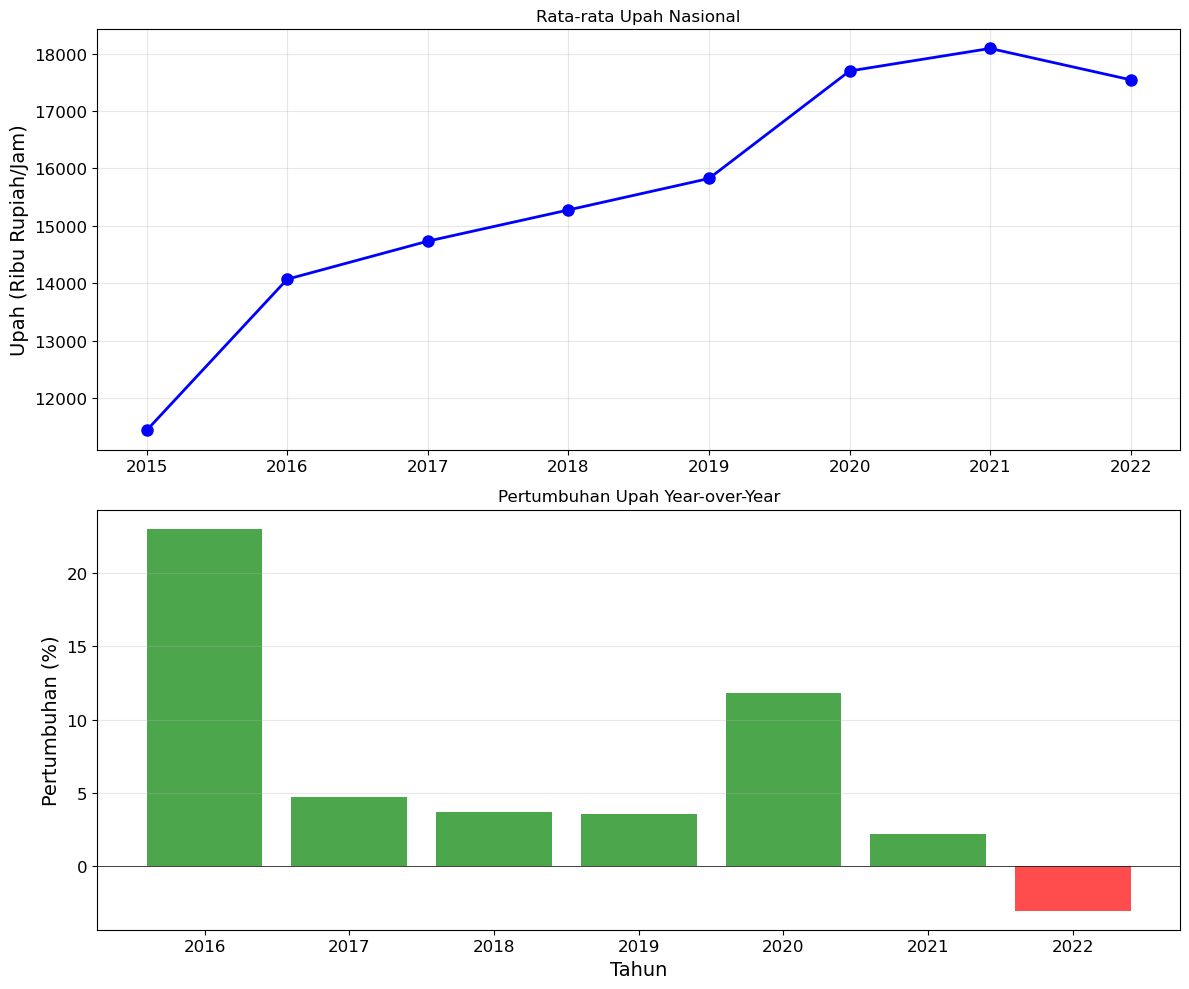

In [21]:
# Hitung pertumbuhan upah per tahun untuk Indonesia
indonesia_data_sorted = indonesia_data.sort_values('tahun')
indonesia_data_sorted['pertumbuhan'] = indonesia_data_sorted['upah'].pct_change() * 100

print("Pertumbuhan Upah Nasional (Year-over-Year):")
print(indonesia_data_sorted[['tahun', 'upah', 'pertumbuhan']])

# Visualisasi pertumbuhan
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Upah absolut
ax1.plot(indonesia_data_sorted['tahun'], indonesia_data_sorted['upah'], 'bo-', linewidth=2, markersize=8)
ax1.set_ylabel('Upah (Ribu Rupiah/Jam)')
ax1.set_title('Rata-rata Upah Nasional')
ax1.grid(True, alpha=0.3)

# Pertumbuhan
colors = ['green' if x > 0 else 'red' for x in indonesia_data_sorted['pertumbuhan'][1:]]
ax2.bar(indonesia_data_sorted['tahun'][1:], indonesia_data_sorted['pertumbuhan'][1:], color=colors, alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_xlabel('Tahun')
ax2.set_ylabel('Pertumbuhan (%)')
ax2.set_title('Pertumbuhan Upah Year-over-Year')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
save_fig('upah_growth_analysis')
plt.show()

# Kesimpulan

Dari analisis data upah pekerja Indonesia (2015-2022):

1. **Trend Upah**: Terdapat trend peningkatan upah dari tahun ke tahun
2. **Model Linear Regression**: Memberikan prediksi yang baik dengan R² score yang tinggi
3. **Variasi Regional**: Terdapat perbedaan signifikan upah antar provinsi
4. **Prediksi**: Model dapat digunakan untuk memproyeksikan upah di tahun-tahun mendatang

Model ini dapat membantu:
- Perencanaan kebijakan upah minimum
- Analisis kesenjangan upah antar daerah
- Proyeksi biaya tenaga kerja untuk industri